In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/heart.csv')
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [3]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [4]:
X = df.iloc[:,:-1]
X.shape

(303, 13)

In [5]:
y = df['target']
y.shape

(303,)

nn architecture

In [6]:
from sklearn import metrics
model = tf.keras.models.Sequential()
norm = tf.keras.layers.Normalization()
norm.adapt(X)
model.add(norm)
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=64,activation='relu'))
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
model.summary()

es =  tf.keras.callbacks.EarlyStopping(patience=10)
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=.01),
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics = ['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 13)               27        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 9,308
Trainable params: 9,281
Non-trainable params: 27
_____________________________________________________

In [7]:
history = model.fit(x=X,y=y, epochs=100, callbacks=[es],validation_split=.2, verbose=True)

Epoch 1/100
8/8 [==============================] - 1s 31ms/step - loss: 0.4584 - accuracy: 0.7769 - val_loss: 0.3167 - val_accuracy: 0.8197
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 0.3402 - accuracy: 0.8512 - val_loss: 1.4721 - val_accuracy: 0.4754
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 0.2500 - accuracy: 0.9091 - val_loss: 0.7114 - val_accuracy: 0.6230
Epoch 4/100
8/8 [==============================] - 0s 5ms/step - loss: 0.2088 - accuracy: 0.9132 - val_loss: 1.1065 - val_accuracy: 0.6066
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 0.1870 - accuracy: 0.9380 - val_loss: 1.1519 - val_accuracy: 0.5738
Epoch 6/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1353 - accuracy: 0.9545 - val_loss: 1.2907 - val_accuracy: 0.6230
Epoch 7/100
8/8 [==============================] - 0s 5ms/step - loss: 0.1286 - accuracy: 0.9463 - val_loss: 1.2069 - val_accuracy: 0.6393
Epoch 8/100
8/8 [=========

In [8]:
df = pd.DataFrame(history.history)
df['epoch'] =  history.epoch

In [9]:
import plotly.express as px

In [10]:
import matplotlib.pyplot as plt

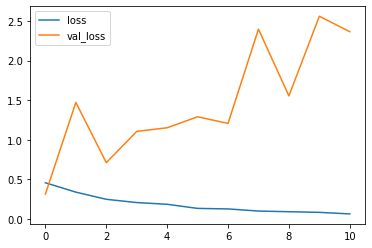

In [11]:
df[['loss','val_loss']].plot()

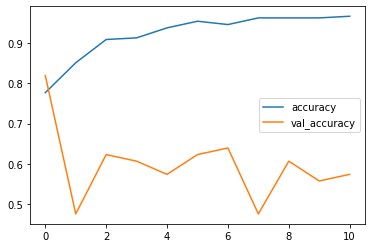

In [12]:
df[['accuracy','val_accuracy']].plot()

In [13]:
model.save('model_bekar_h')

INFO:tensorflow:Assets written to: model_bekar_h/assets
